In [291]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [292]:
# Cargar dataset de propinas
propinas = sns.load_dataset('tips')
propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [293]:
# Mostrar 5 registros aleatorios
propinas.sample(5)

,total_bill,tip,sex,smoker,day,time,size
190,15.69,1.50,Male,Yes,Sun,Dinner,2
53,9.94,1.56,Male,No,Sun,Dinner,2
15,21.58,3.92,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
143,27.05,5.00,Female,No,Thur,Lunch,6


In [294]:
# Traducir columnas
propinas.columns = ['total', 'propina', 'sexo', 'fumador', 'dia', 'turno', 'num_personas']
propinas.head()

,total,propina,sexo,fumador,dia,turno,num_personas
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [295]:
# Información del dataset
propinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   total         244 non-null    float64 
 1   propina       244 non-null    float64 
 2   sexo          244 non-null    category
 3   fumador       244 non-null    category
 4   dia           244 non-null    category
 5   turno         244 non-null    category
 6   num_personas  244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [296]:
# Estadísticas descriptivas
propinas.describe()

,total,propina,num_personas
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Graficos de barra con comparativa

<Axes: xlabel='dia', ylabel='total'>

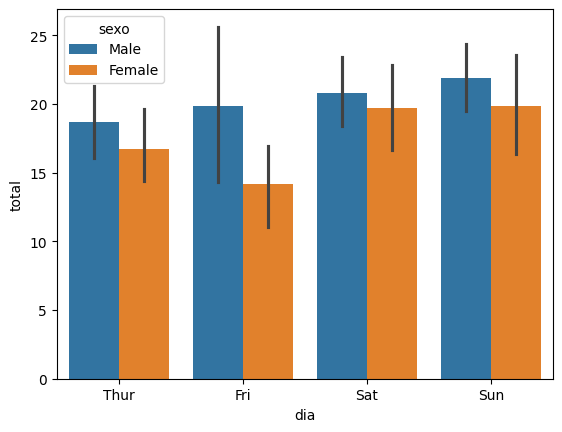

In [297]:
sns.barplot(x='dia', y='total', data=propinas, hue='sexo')

<Axes: xlabel='dia', ylabel='total'>

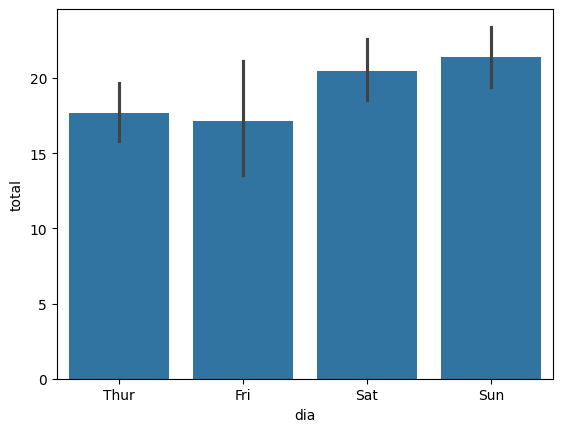

In [298]:
sns.barplot(x='dia', y='total', data=propinas)

<Axes: xlabel='dia', ylabel='total'>

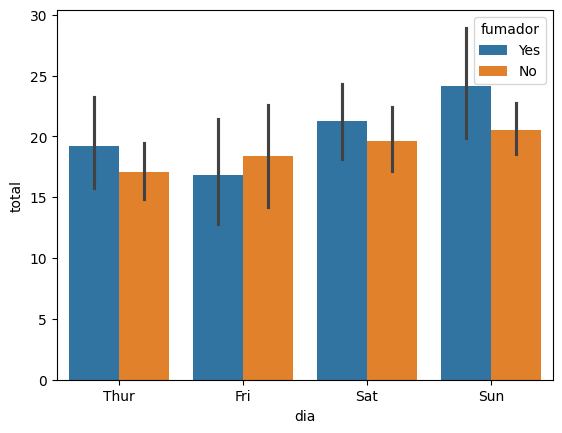

In [299]:
sns.barplot(x='dia', y='total', data=propinas, hue='fumador')

<Axes: xlabel='dia', ylabel='total'>

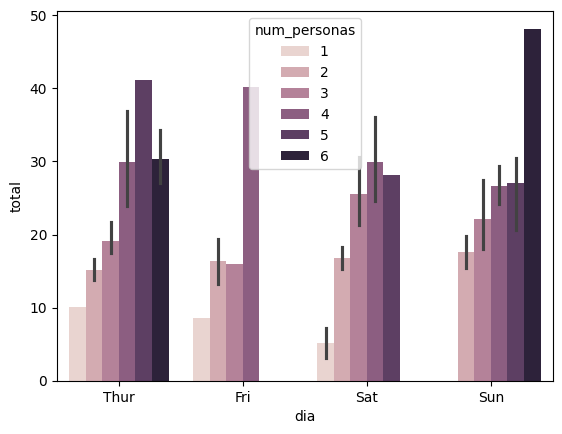

In [300]:
sns.barplot(x='dia', y='total', data=propinas, hue='num_personas')

<Axes: xlabel='dia', ylabel='propina'>

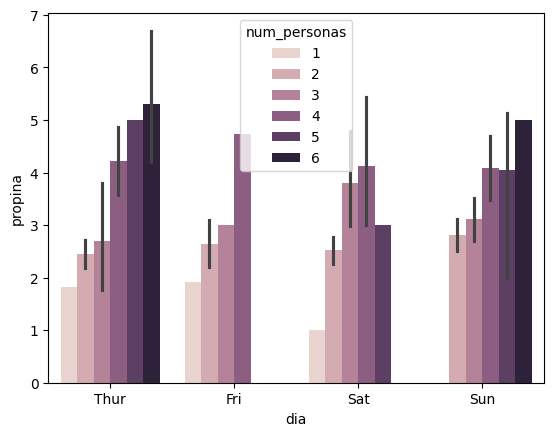

In [301]:
sns.barplot(x='dia', y='propina', data=propinas, hue='num_personas')

## Gráficos de caja

<Axes: xlabel='dia', ylabel='propina'>

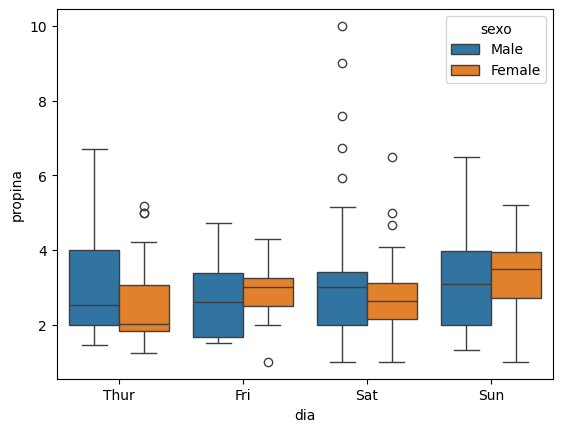

In [302]:
sns.boxplot(x='dia', y='propina', data=propinas, hue='sexo')

## Gráficos de dispersión

<Axes: xlabel='total', ylabel='propina'>

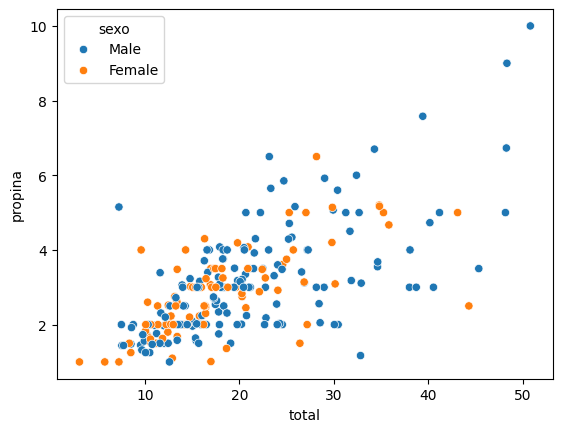

In [303]:
sns.scatterplot(x='total', y='propina', data=propinas, hue='sexo')

<Axes: xlabel='total', ylabel='propina'>

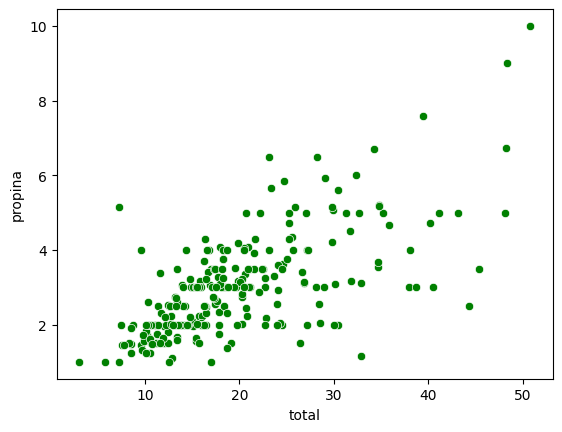

In [304]:
sns.scatterplot(x='total', y='propina', data=propinas, c='g')

## Distribución

C:\Users\Felipe\AppData\Local\Temp\ipykernel_21380\1672551521.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(propinas['total'], kde=True)


<Axes: xlabel='total', ylabel='Density'>

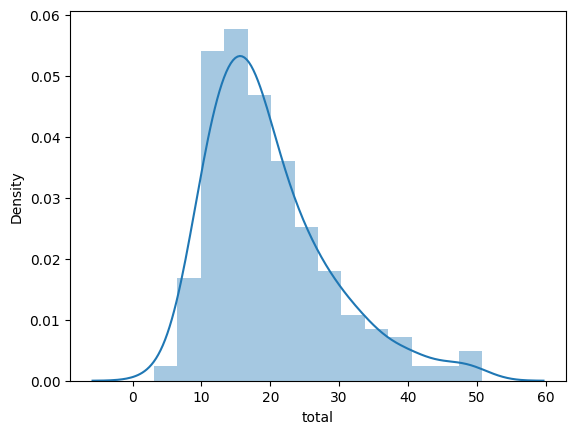

In [305]:
sns.distplot(propinas['total'], kde=True)


<Axes: xlabel='total', ylabel='Count'>

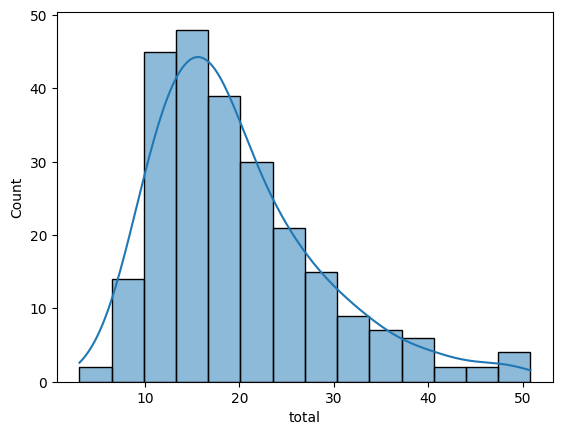

In [306]:
sns.histplot(propinas['total'], kde=True)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_21380\3468169217.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(propinas['propina'], kde=True)


<Axes: xlabel='propina', ylabel='Density'>

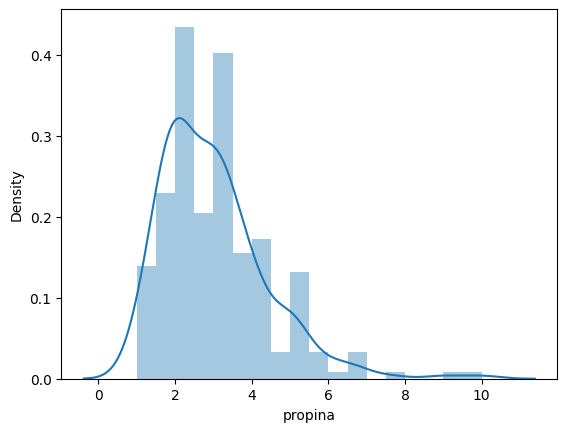

In [307]:
sns.distplot(propinas['propina'], kde=True)

<Axes: xlabel='propina', ylabel='Count'>

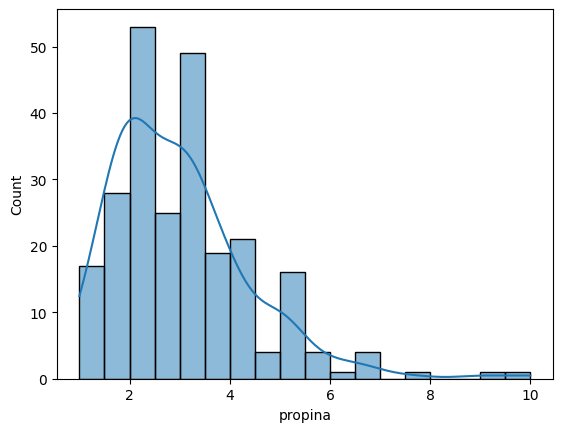

In [308]:
sns.histplot(propinas['propina'], kde=True)

## Matriz de Correlación

<Axes: >

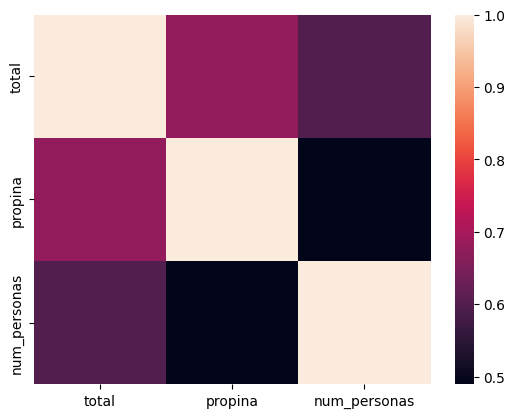

In [309]:
# Eliminar variables categoricas
propinas_cat = propinas.drop(['sexo', 'fumador', 'dia', 'turno'], axis=1)

sns.heatmap(propinas_cat.corr(), annot=False)

In [310]:
# Columnas categoricas
categoricas = (propinas.dtypes == 'category')
categoricas

total           False
propina         False
sexo             True
fumador          True
dia              True
turno            True
num_personas    False
dtype: bool

In [311]:
# Dummies para variables categóricas
datos_dummies = pd.get_dummies(propinas)
datos_dummies.columns

Index(['total', 'propina', 'num_personas', 'sexo_Male', 'sexo_Female',
       'fumador_Yes', 'fumador_No', 'dia_Thur', 'dia_Fri', 'dia_Sat',
       'dia_Sun', 'turno_Lunch', 'turno_Dinner'],
      dtype='object')

# Regresión

In [312]:
#!pip install scikit-learn

In [313]:
# Importar librerías para regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [314]:
# Definir variables independientes y dependientes
lm = LinearRegression()
X = datos_dummies[['total', 'num_personas', 'sexo_Male', 'sexo_Female',
       'fumador_Yes', 'fumador_No', 'dia_Thur', 'dia_Fri', 'dia_Sat',
       'dia_Sun', 'turno_Lunch', 'turno_Dinner']]
y = datos_dummies['propina']

In [315]:
# División train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [316]:
# Entrenamiento del modelo
lm.fit(X_train, y_train)

LinearRegression()

In [317]:
# Predicción
prediccion = lm.predict(X_test)

In [318]:
# Comparación
resultado = {'Real': y_test, 'Prediccion': prediccion}
resultado = pd.DataFrame(resultado)
resultado.head(10)

,Real,Prediccion
67,1.00,1.144107
243,3.00,2.399181
206,3.41,3.485860
122,2.50,2.438340
89,3.00,2.998877
218,1.44,1.714474
58,1.76,1.998804
186,3.50,3.047190
177,2.00,2.236508
4,3.61,3.738183


In [319]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, prediccion)
print('MAE:', mae)

MAE: 0.7956578566938417


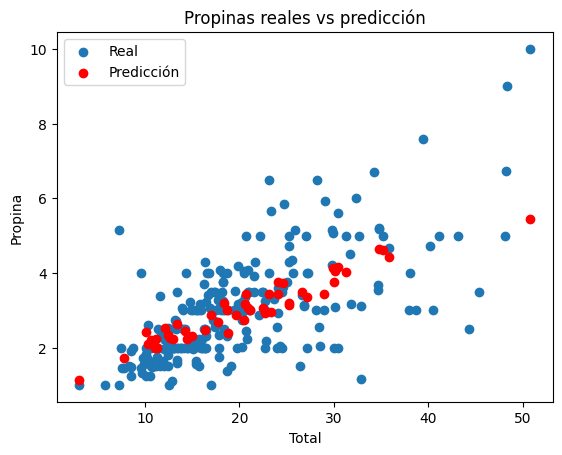

In [323]:
# Gráfico de propinas
propina = propinas['propina']
plt.scatter(propinas['total'], propina, label='Real')
plt.scatter(X_test['total'], prediccion, c='red', label='Predicción')
plt.legend()
plt.xlabel('Total')
plt.ylabel('Propina')
plt.title('Propinas reales vs predicción')
plt.show()
